Install Required Libraries

In [1]:
%pip install pil

ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil
You should consider upgrading via the '/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/bin/python -m pip install --upgrade pip' command.


In [11]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import os
from urllib.parse import urlparse
from skimage.io import imread
from PIL import Image
from PIL import ImageFilter
from skimage.transform import resize
import image_utils as iu
import random
import parsl
from parsl.app.app import python_app, bash_app
import uuid
from shutil import copy2
# parsl.load()


In [12]:
data_path = 'data'
#Mining 1 contains satellite images from Google earth taken with screenshots.
mining_path = os.path.join(data_path, 'mining')
mining1_data_path = os.path.join(mining_path, 'mining-sites-original')
#Mining 2 contains satellite images from Planet website taken with screenshots.
mining2_data_path = os.path.join(mining_path, 'mining-sites', 'mining2')
#path to store cropped images
mining1_cropped_data_path = os.path.join(
    mining_path, 'mining-sites-cropped')
mining2_cropped_data_path = os.path.join(mining_path, 'mining-sites-cropped', 'mining2')
#
mining1_divided_data_path = os.path.join(
    mining_path, 'mining-sites-divided')
mining2_divided_data_path = os.path.join(mining_path, 'mining-sites-divided', 'mining2')
#
mining1_final_data_path = os.path.join(
    mining_path, 'mining-sites-final')
#
# mining_final_data_path = os.path.join(mining_path, 'mining-sites-final')
# Settlement paths
settlement_path = os.path.join(data_path, 'settlement')
settlement_data_path = os.path.join(settlement_path, 'settlement-original')
settlement_cropped_data_path = os.path.join(
    settlement_path, 'settlement-cropped')
settlement_divided_data_path = os.path.join(
    settlement_path, 'settlement-divided')
settlement_final_data_path = os.path.join(
    settlement_path, 'settlement-final')
# Vegetation paths
vegetation_path = os.path.join(data_path, 'vegetation')
vegetation_data_path = os.path.join(vegetation_path, 'vegetation-original')
vegetation_cropped_data_path = os.path.join(
    vegetation_path, 'vegetation-cropped')
vegetation_divided_data_path = os.path.join(
    vegetation_path, 'vegetation-divided')
vegetation_final_data_path = os.path.join(
    vegetation_path, 'vegetation-final')
# Waterbody path
waterbody_path = os.path.join(data_path, 'waterbody')
waterbody_data_path = os.path.join(waterbody_path, 'waterbody-original')
waterbody_final_data_path = os.path.join(waterbody_path, 'waterbody-final')
# Training paths
training_path = os.path.join(data_path, 'train-data')
train_path = os.path.join(training_path, 'train')
val_path = os.path.join(training_path, 'val')
test_path = os.path.join(training_path, 'test')
#
train_mining_site_path = os.path.join(train_path, 'mining-site')
train_settlement_path = os.path.join(train_path, 'settlement')
train_vegetation_path = os.path.join(train_path, 'vegetation')
train_waterbody_path = os.path.join(train_path, 'waterbody')
#
val_mining_site_path = os.path.join(train_path, 'mining-site')
val_settlement_path = os.path.join(train_path, 'settlement')
val_vegetation_path = os.path.join(train_path, 'vegetation')
val_waterbody_path = os.path.join(train_path, 'waterbody')
#
test_mining_site_path = os.path.join(train_path, 'mining-site')
test_settlement_path = os.path.join(train_path, 'settlement')
test_vegetation_path = os.path.join(train_path, 'vegetation')
test_waterbody_path = os.path.join(train_path, 'waterbody')


In [3]:
def create_dir_if_not_exists(path):
    if os.path.exists(path):
        return
    os.makedirs(path)


In [4]:
def load_images_in_dir(path):
    images_path = iu.get_all_files(path)
    images = [None] * len(images_path)
    for x in range(len(images_path)):  
        images[x] = iu.read_image(os.path.join(
        path, images_path[x]), 'RGB')
    return images

In [13]:
def crop_all_images(images, box):
    images_cropped = [None] * len(images)
    for x in range(len(images)):
        images_cropped[x] = images[x].crop(box)
    return images_cropped

In [14]:
def split_image(image, row_count, col_count):
    parts = []
    width, height = image.size
    left = 0
    top = 0
    right = width / col_count
    bottom = height / row_count
    for r in range(row_count):
        top = int(r * (height / row_count))
        bottom = int(top + (height / row_count))
        for c in range(col_count):
            left = int(c * (width / col_count))
            right = int(left + (width / col_count))
            part = image.crop((left, top, right, bottom))
            parts.append(part)
    return parts

Prepare Mining-Site Dataset

In [ ]:
#Load the images into memory.
mining1_images = load_images_in_dir(mining1_data_path)

In [8]:
mining2_images = load_images_in_dir(mining2_data_path)

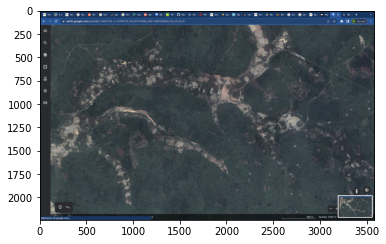

In [5]:
#visualize raw image
iu.display_image(mining1_images[0])


In [ ]:
#The images are being cropped to remove some noise for mining 1.
width, height = mining1_images[0].size
left = 118
top = 162
right = width
bottom = 1878
mining1_images_cropped = crop_all_images(mining1_images, (left, top, right, bottom))

In [9]:
#The images are being cropped to remove some noise for mining 2.
width, height = mining2_images[0].size
left = 802
top = 162
right = width
bottom = height
mining2_images_cropped = crop_all_images(
    mining2_images, (left, top, right, bottom))


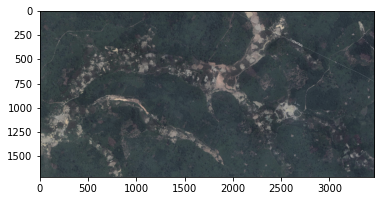

In [24]:
# Visualize the cropped image for mining1
iu.display_image(mining1_images_cropped[0])


In [34]:
# Create dir to save images
create_dir_if_not_exists(mining1_cropped_data_path)
# Save the cropped images for image 1.
for x in range(len(mining1_images_cropped)):
    image = mining1_images_cropped[x]
    image.save(os.path.join(mining1_cropped_data_path, str(uuid.uuid4()) + ".jpg"))


In [10]:
# Create dir to save images
iu.create_dir_if_not_exists(mining2_cropped_data_path)
# Save the cropped images for image 1.
for x in range(len(mining2_images_cropped)):
    image = mining2_images_cropped[x]
    image.save(os.path.join(mining2_cropped_data_path, str(uuid.uuid4()) + ".jpg"))

In [6]:
#Load the cropped images for mining 1.
#NB: Its only necessary if the kernel has been restarted
#and you do not want to start the whole process again.
mining1_images_cropped = load_images_in_dir(mining1_cropped_data_path)

In [28]:
# Set the mining images to none to free memory.
mining1_images = None
# mining2_images = None

In [46]:
mining1_images_divided = []
for image in mining1_images_cropped:
    parts = split_image(image, 2, 2)
    for part in parts:
        mining1_images_divided.append(part)
    


In [ ]:
#The full image is resized and added to the divided image.
#This is to add to the training data.
width, height = mining1_images_cropped[0].size
for image in mining1_images_cropped:
    resized_image = image.resize((width, height),)
    mining1_images_divided.append(resized_image)


In [14]:
# Create dir to save images
create_dir_if_not_exists(mining1_divided_data_path)
#Save the divided images for mining 1.
for x in range(len(mining1_images_divided)):
    image = mining1_images_divided[x]
    image.save(os.path.join(mining1_divided_data_path, str(uuid.uuid4()) + '.jpg'))


In [11]:
#Load the divided images for mining 1.
#NB: Its only necessary if the kernel has been restarted
#and you do not want to start the whole process again.
mining1_images_divided = load_images_in_dir(mining1_divided_data_path)


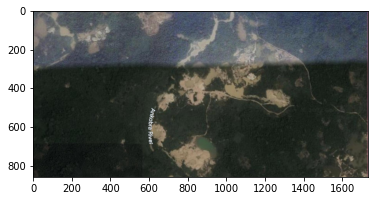

In [12]:
iu.display_image(mining1_images_divided[0])

In [13]:
# Set the cropped images array to none to free memory.
mining1_images_cropped = None

Prepare Settlement Dataset

In [15]:
#Load the images into memory.
settlement_images = load_images_in_dir(settlement_data_path)

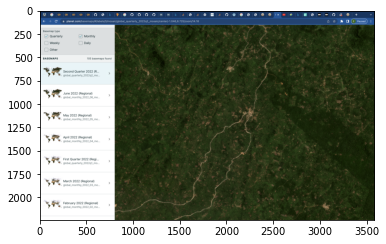

In [16]:
#visualize raw image
iu.display_image(settlement_images[0])


In [17]:
#The images are being cropped to remove some noise for Settlement 1.
width, height = settlement_images[0].size
# left = 118
# top = 162
left = 802
top = 162
right = width
# bottom = 1878
bottom = height
settlement_images_cropped = crop_all_images(
    settlement_images, (left, top, right, bottom))


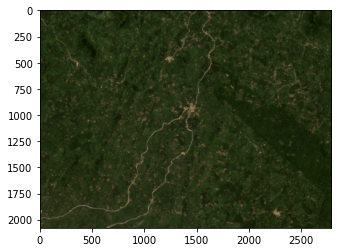

In [18]:
# Visualize the cropped image for Settlement
iu.display_image(settlement_images_cropped[0])


In [19]:
# Create directory to store images.
create_dir_if_not_exists(settlement_cropped_data_path)
#Save the cropped images for image 1.
for x in range(len(settlement_images_cropped)):
    image = settlement_images_cropped[x]
    image.save(os.path.join(settlement_cropped_data_path,
                            str(uuid.uuid4()) + ".jpg"))


In [20]:
#Load the cropped images for Settlement.
#NB: Its only necessary if the kernel has been restarted
#and you do not want to start the whole process again.
settlement_images_cropped = load_images_in_dir(settlement_cropped_data_path)

In [22]:
settlement_images = None

In [19]:
settlement_images_divided = []
for image in settlement_images_cropped:
    parts = split_image(image, 2, 2)
    for part in parts:
        settlement_images_divided.append(part)


In [20]:
#The full image is resized and added to the divided image.
#This is to add to the training data.
width, height = settlement_images_cropped[0].size
for image in settlement_images_cropped:
    resized_image = image.resize((width, height),)
    settlement_images_divided.append(resized_image)


In [21]:
# Create directory to store images.
create_dir_if_not_exists(settlement_divided_data_path)
#Save the divided images for settlement.
for x in range(len(settlement_images_divided)):
    image = settlement_images_divided[x]
    image.save(os.path.join(settlement_divided_data_path,
                            str(uuid.uuid4()) + '.jpg'))


In [54]:
#Load the divided images for mining 1.
#NB: Its only necessary if the kernel has been restarted
#and you do not want to start the whole process again.
settlement_images_divided = load_images_in_dir(settlement_divided_data_path)


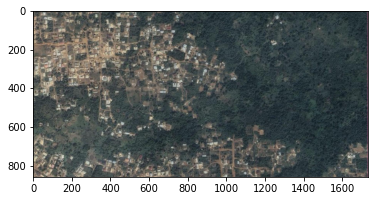

In [7]:
iu.display_image(settlement_images_divided[0])

In [ ]:
# Set the cropped images array to none to free memory.
settlement_images_cropped = None


Prepare Vegetation Dataset

In [39]:
#Load the images into memory.
vegetation_images = load_images_in_dir(vegetation_data_path)

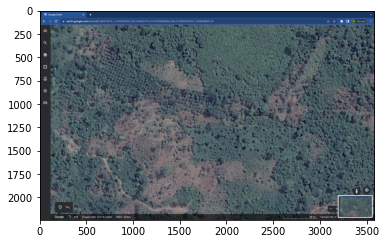

In [40]:
#visualize raw image
iu.display_image(vegetation_images[0])

In [41]:
#The images are being cropped to remove some noise for mining 1.
width, height = vegetation_images[0].size
left = 118
top = 162
right = width
bottom = 1878
vegetation_images_cropped = crop_all_images(
    vegetation_images, (left, top, right, bottom))


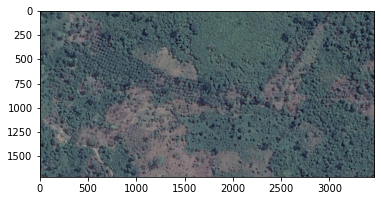

In [42]:
# Visualize the cropped image for vegetation
iu.display_image(vegetation_images_cropped[0])


In [43]:
# Create dir to save images
create_dir_if_not_exists(vegetation_cropped_data_path)
# Save the cropped images for image 1.
for x in range(len(vegetation_images_cropped)):
    image = vegetation_images_cropped[x]
    image.save(os.path.join(vegetation_cropped_data_path, str(uuid.uuid4()) + ".jpg"))


In [34]:
#Load the cropped images for mining 1.
#NB: Its only necessary if the kernel has been restarted
#and you do not want to start the whole process again.
vegetation_images_cropped = load_images_in_dir(vegetation_cropped_data_path)

In [48]:
# Set the mining images to none to free memory.
vegetation_images = None


In [45]:
vegetation_images_divided = []
for image in vegetation_images_cropped:
    parts = split_image(image, 2, 2)
    for part in parts:
        vegetation_images_divided.append(part)


In [46]:
#The full image is resized and added to the divided image.
#This is to add to the training data.
width, height = vegetation_images_cropped[0].size
for image in vegetation_images_cropped:
    resized_image = image.resize((width, height),)
    vegetation_images_divided.append(resized_image)


In [47]:
# Create dir to save images
create_dir_if_not_exists(vegetation_divided_data_path)
#Save the divided images for vegetation.
for x in range(len(vegetation_images_divided)):
    image = vegetation_images_divided[x]
    image.save(os.path.join(
        vegetation_divided_data_path, str(uuid.uuid4()) + '.jpg'))


In [ ]:
#Load the divided images for mining 1.
#NB: Its only necessary if the kernel has been restarted
#and you do not want to start the whole process again.
vegetation_images_divided = load_images_in_dir(vegetation_divided_data_path)


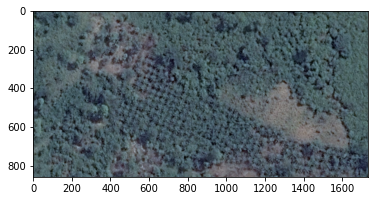

In [49]:
iu.display_image(vegetation_images_divided[0])


In [50]:
# Set the cropped images array to none to free memory.
vegetation_images_cropped = None

Prepare Waeterbody Dataset

In [63]:
# Water body images are loaded into the memory.
waterbody_images_divided = load_images_in_dir(waterbody_data_path)

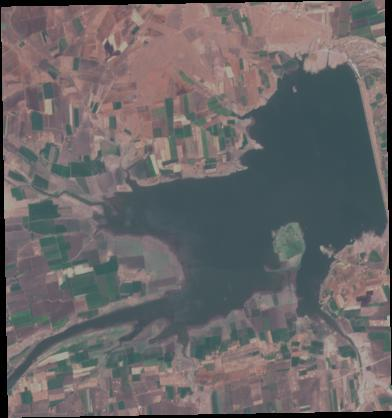

In [65]:
waterbody_images_divided[0]

Augment data

In [21]:
def aug_image(image):
    images_augmented = []
    image = image.resize((320, 320))
    new_im = image
    images_augmented.append(new_im)
    images_augmented.append(new_im.rotate(90))
    images_augmented.append(new_im.rotate(180))
    images_augmented.append(new_im.rotate(270))
    new_im = image.transpose(Image.FLIP_LEFT_RIGHT)
    images_augmented.append(new_im)
    images_augmented.append(new_im.rotate(90))
    images_augmented.append(new_im.rotate(180))
    images_augmented.append(new_im.rotate(270))
    # new_im = image.filter(ImageFilter.GaussianBlur(radius=3))
    # images_augmented.append(new_im)
    # images_augmented.append(new_im.rotate(90))
    # images_augmented.append(new_im.rotate(180))
    # images_augmented.append(new_im.rotate(270))
    # new_im = image.transpose(Image.FLIP_LEFT_RIGHT).filter(
    #     ImageFilter.GaussianBlur(radius=3))
    # images_augmented.append(new_im)
    # images_augmented.append(new_im.rotate(90))
    # images_augmented.append(new_im.rotate(180))
    # images_augmented.append(new_im.rotate(270))
    return images_augmented
    # for aug_image in images_augmented:
    #     aug_image.save(os.path.join(
    #         mining1_augmented_data_path, str(i) + '.jpg'))
    #     i += 1


In [25]:
# Create the folder to store final mining images
create_dir_if_not_exists(mining1_final_data_path)
for image in mining1_images_divided:
    images_aug = aug_image(image)
    for a_image in images_aug:
        a_image.save(os.path.join(
            mining1_final_data_path, str(uuid.uuid4()) + '.jpg'))


In [55]:
# Create the folder to store final settlement images
create_dir_if_not_exists(settlement_final_data_path)
for image in settlement_images_divided:
    aug_images = aug_image(image)
    for a_image in aug_images:
        a_image.save(os.path.join(
            settlement_final_data_path, str(uuid.uuid4()) + '.jpg'))


In [52]:
# Create the folder to store final vegetation images
create_dir_if_not_exists(vegetation_final_data_path)
for image in vegetation_images_divided:
    aug_images = aug_image(image)
    for a_image in aug_images:
        a_image.save(os.path.join(
            vegetation_final_data_path, str(uuid.uuid4()) + '.jpg'))


In [66]:
# Create the folder to store final waterbody images
create_dir_if_not_exists(waterbody_final_data_path)
for image in waterbody_images_divided:
    aug_images = aug_image(image)
    for a_image in aug_images:
        a_image.save(os.path.join(
            waterbody_final_data_path, str(uuid.uuid4()) + '.jpg'))


In [31]:
mining1_images_divided = None
settlement_images_divided = None
vegetation_images_divided = None
waterbody_images_divided = None

In [46]:
a = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [47]:
a[0: 4]

[1, 2, 3, 4]

In [50]:
a[4: 4 + 5]

[5, 6, 7, 8, 9]

In [59]:
a[4+5: len(a)]

[10, 11, 12, 13, 14, 15, 16, 17, 18]

Create train, evaluate and test data

In [71]:
def train_val_test_split(data, val_percent, test_percent):
    val_count = int(len(data) * val_percent)
    test_count = int(len(data) * test_percent)
    val_arr = data[0:val_count]
    test_arr = data[val_count: val_count + test_count]
    train_arr = data[val_count + test_count: len(data)]
    return (train_arr, val_arr, test_arr)


In [20]:
mining_site_image_paths = iu.get_all_files(mining1_final_data_path)
settlement_image_paths = iu.get_all_files(settlement_final_data_path)
vegetation_image_paths = iu.get_all_files(vegetation_final_data_path)
waterbody_image_paths = iu.get_all_files(waterbody_final_data_path)


In [99]:
def copy_images_to_train_val_test_dir(data, training_dir, label ,val_percent, test_percent):
    (train, val, test) = train_val_test_split(data, val_percent, test_percent)
    # creates the train, val and test directories.
    train_path = os.path.join(training_dir, 'train')
    val_path = os.path.join(training_dir, 'val')
    test_path = os.path.join(training_dir, 'test')
    create_dir_if_not_exists(train_path)
    create_dir_if_not_exists(val_path)
    create_dir_if_not_exists(test_path)
    # creates the directory for the label in the train, val and test directories.
    train_label_path = os.path.join(train_path, label)
    val_label_path = os.path.join(val_path, label)
    test_label_path = os.path.join(test_path, label)
    create_dir_if_not_exists(train_label_path)
    create_dir_if_not_exists(val_label_path)
    create_dir_if_not_exists(test_label_path)
    # Copy the train, val and test files to the train, val and test directories.
    for image_path in train:
        copy2(image_path, os.path.join(train_label_path, os.path.basename(image_path)))
    for image_path in val:
        copy2(image_path, os.path.join(val_label_path, os.path.basename(image_path)))
    for image_path in test:
        copy2(image_path,  os.path.join(test_label_path, os.path.basename(image_path)))


In [98]:
copy_images_to_train_val_test_dir(mining_site_image_paths, training_path, 'mining-site', 0.15, 0.05)

In [100]:
copy_images_to_train_val_test_dir(settlement_image_paths, training_path, 'settlement', 0.15, 0.05)


In [101]:
copy_images_to_train_val_test_dir(
    vegetation_image_paths, training_path, 'vegetation', 0.15, 0.05)


In [102]:
copy_images_to_train_val_test_dir(
    waterbody_image_paths, training_path, 'waterbody', 0.15, 0.05)